In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [ ]:
#Upload cleaned csv on Colab
df = pd.read_csv('/GSS2018 (1).csv')


In [ ]:
# Columns of interest
columns_want = ['RELIG', 'CHILDS', 'AGEKDBRN', 'EDUC', 'HAPPY', 'ATTEND', 'GOD', 'INCOME', 'FAMGEN', 'AGE', 'SEX', 'RACE', 'MARITAL', 'POLVIEWS']
# New DataFrame
df_cleaned = df[columns_want]


In [ ]:
# Convert 'INCOME' to numeric
df_selected.loc[:, 'INCOME'] = pd.to_numeric(df_selected['INCOME'], errors='coerce')

# Cap 'AGE' at 100
df_selected.loc[:, 'AGE'] = df_selected['AGE'].apply(lambda x: min(x, 100))

# Drop rows with more than 3 missing values
df_cleaned = df_selected.dropna(thresh=len(df_selected.columns) - 3)


<ipython-input-9-5af32b087948>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.loc[:, 'INCOME'] = pd.to_numeric(df_selected['INCOME'], errors='coerce')
<ipython-input-9-5af32b087948>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.loc[:, 'AGE'] = df_selected['AGE'].apply(lambda x: min(x, 100))


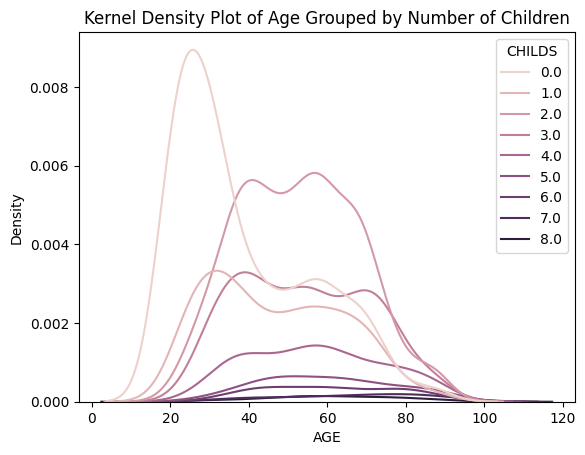

Summary Statistics: 
              RELIG       CHILDS     AGEKDBRN         EDUC        HAPPY  \
count  2323.000000  2338.000000  1664.000000  2337.000000  2337.000000   
mean      2.279811     1.859281    24.287861    13.730424     1.844673   
std       1.833054     1.674484     5.726536     2.974648     0.646585   
min       1.000000     0.000000    12.000000     0.000000     1.000000   
25%       1.000000     0.000000    20.000000    12.000000     1.000000   
50%       2.000000     2.000000    23.000000    14.000000     2.000000   
75%       4.000000     3.000000    28.000000    16.000000     2.000000   
max      13.000000     8.000000    51.000000    20.000000     3.000000   

            ATTEND          GOD       INCOME      FAMGEN          AGE  \
count  2328.000000  2313.000000  1983.000000  2339.00000  2334.000000   
mean      3.112113     4.865110    10.949571     1.52159    48.969580   
std       2.810422     1.554922     2.384883     0.92897    18.083376   
min       0.000000 

In [ ]:
# Kernel Density Plot of 'AGE' by 'SEX'
sns.kdeplot(data=df_cleaned, x='AGE', hue='CHILDS')
plt.title('Kernel Density Plot of Age Grouped by Number of Children')
plt.show()

# Stats
stats = df_cleaned.describe()
print("Summary Statistics: \n", stats)


**Analysis** of density plot of age grouped by number of children:

- Most people with 0 children are younger in age (makes sense)
- Very few people have more than 5 children
- Most common to be middle-aged (30-50) with 3 children



In [ ]:
# Number of total real values in each column
non_null_count = df_cleaned.count()
print("Number of Non-Null Values: \n", non_null_count)


Number of Non-Null Values: 
 RELIG       2323
CHILDS      2338
AGEKDBRN    1664
EDUC        2337
HAPPY       2337
ATTEND      2328
GOD         2313
INCOME      1983
FAMGEN      2339
AGE         2334
SEX         2339
RACE        2339
MARITAL     2338
POLVIEWS    2244
dtype: int64


<ipython-input-12-27288ead387e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.loc[:, 'INCOME'].fillna(median_income, inplace=True)


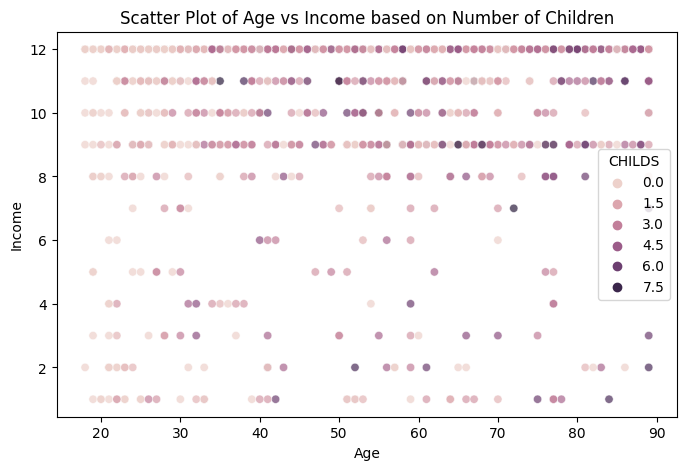

In [ ]:
# Impute missing values for 'INCOME' with median
median_income = df_cleaned['INCOME'].median()
df_cleaned.loc[:, 'INCOME'].fillna(median_income, inplace=True)

# Scatter plot of 'AGE' vs 'INCOME', differentiated by 'CHILDS'
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_cleaned, x='AGE', y='INCOME', hue='CHILDS', alpha=0.7)
plt.title('Scatter Plot of Age vs Income based on Number of Children')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()


Correlation Matrix for Selected Variables
The heatmap below shows the correlation matrix for selected variables: 'AGE', 'INCOME', 'EDUC', and 'HAPPY'.

AGE: The age of the respondent.
INCOME: The income category to which the respondent belongs.
EDUC: The highest educational degree obtained by the respondent.
HAPPY: The general happiness level of the respondent.
Interpretation:

Positive numbers indicate a positive correlation: as one variable increases, the other variable tends to also increase.
Negative numbers indicate a negative correlation: as one variable increases, the other variable tends to decrease.
Values close to 1 or -1 indicate a strong correlation, while values close to 0 indicate weak or no correlation.


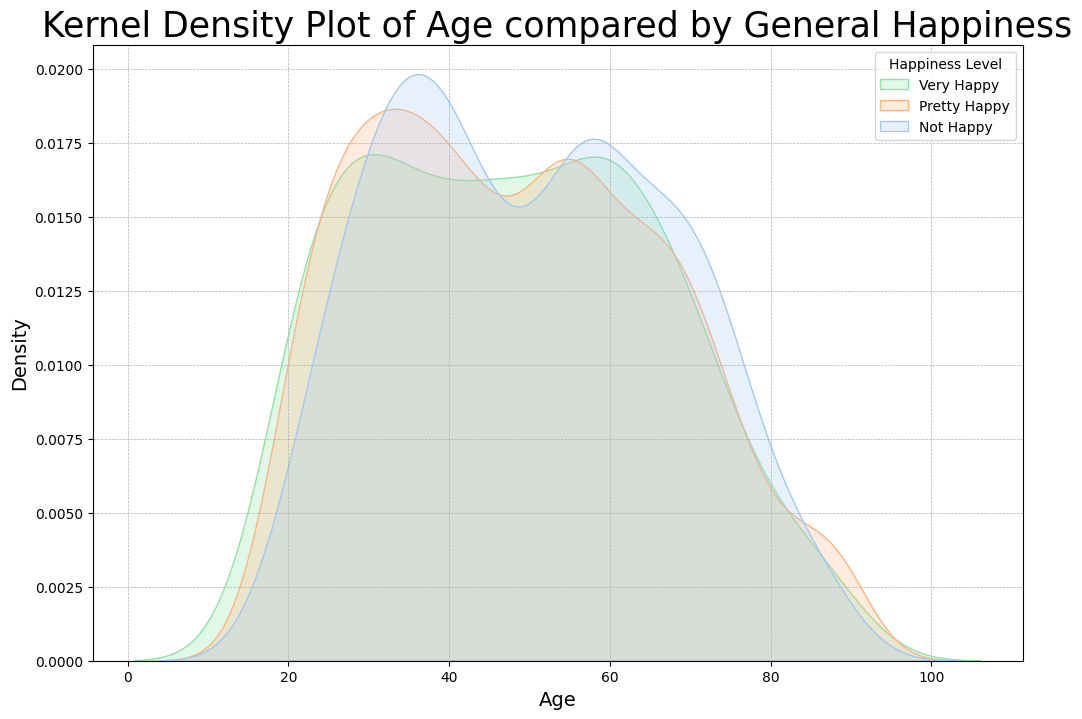

In [ ]:
# Create the figure
plt.figure(figsize=(12, 8))

# Create the grouped Kernel Density Plot with fill and custom palette
sns.kdeplot(data=df_cleaned, x='AGE', hue='HAPPY', common_norm=False, fill=True, palette="pastel")

# Adding Annotations for minimum and maximum education levels
min_val = df_cleaned['AGE'].min()
max_val = df_cleaned['AGE'].max()


# Adding gridlines
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Adding Labels and Titles
plt.title('Kernel Density Plot of Age compared by General Happiness', fontsize=25)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Customize the legend
plt.legend(title='Happiness Level', labels=['Very Happy', 'Pretty Happy', 'Not Happy'])

# Show the plot
plt.show()
